# Exploratory Data Analysis(EDA) with IEEE-CIS Fraud Detection Data Set
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

* To take a closer look at the data take help of `.head()` function of pandas library which returns first five observations of the data set.Similarly `.tail()` returns last five observations of the data set.
* To found out the total number of rows and columns in the data set using `.shape`.
* To see label of each columns in the data set using `.columns.values`
* It is also a good practice to know the columns and their corresponding data types,along with finding whether they contain null values or not with `.info()`
* The `.describe()` function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.
* Few key insights just by looking at dependent variable are as follows:
    * `.unique()`
    * `.value_counts()`
* To chech missing values in the data set's columns using `.isnull().sum()`
* To use `linear regression` for modelling,its necessary to remove correlated variables to improve your model.One can find correlations using pandas `.corr()` function and can visualize the correlation matrix using a heatmap in seaborn.
    * Dark shades represents positive correlation while lighter shades represents negative correlation.
    * If you set annot=True, you’ll get values by which features are correlated to each other in grid-cells.
    * It’s a good practice to remove correlated variables during feature selection.
* To check `Outliers`: `A box plot` (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables.The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.
* To check `the linearity of the variables` it is a good practice to `plot distribution graph` and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.

## Data Description:
### Transaction Table 
    * TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
    * TransactionAMT: transaction payment amount in USD
    * ProductCD: product code, the product for each transaction
    * card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.
    * addr: address
    * dist: distance
    * P_ and (R__) emaildomain: purchaser and recipient email domain
    * C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
    * D1-D15: timedelta, such as days between previous transaction, etc.
    * M1-M9: match, such as names on card and address, etc.
    * Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.
### Categorical Features:
    * ProductCD
    * card1 - card6
    * addr1, addr2
    * P_emaildomain
    * R_emaildomain
    * M1 - M9

### Identity Table
    * Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
    * They're collected by Vesta’s fraud protection system and digital security partners.
    * (The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

    * “id01 to id11 are numerical features for identity, which is collected by Vesta and security partners such as device rating, ip_domain rating, proxy rating, etc. Also it recorded behavioral fingerprint like account login times/failed to login times, how long an account stayed on the page, etc. All of these are not able to elaborate due to security partner T&C. I hope you could get basic meaning of these features, and by mentioning them as numerical/categorical, you won't deal with them inappropriately.”
    
### Categorical Features:
    * DeviceType
    * DeviceInfo
    * id_12 - id_38   

In [1]:
%load_ext lab_black

In [2]:
# This library is to work with Data Frames
import pandas as pd

# This library is to work with vectors
import numpy as np

# This library is to visualise statistical graphs
import seaborn as sns

# This library is to visualise graphs
import matplotlib.pyplot as plt

# To set some ploting parameters
from matplotlib import rcParams

# To supplies classes for manipulating dates and times
import datetime

# Library to work with Regular Expressions
import re

# To ignore filterwarnings
import warnings

# This library is to create dispays
from IPython.display import Image

# Calling reporting functions from util_reporting
from util_reporting import (
    swarmplot_viz,
    crosstab_viz,
    factor_plot_viz,
    relationship_viz,
    df_first_look,
    df_descriptive_statistics,
    countplot_viz,
    df_pivot_aggregated_statistics,
    multiple_plot_viz,
    boxplot_viz,
    histogram_viz,
    distplot_viz,
    correlation_chart,
    distplot_log_viz,
    countplot_pointplot_viz,
)

# Calling reporting functions from util_data_cleaning
from util_data_cleaning import (
    extract_first_string,
    df_numeric_column_filler_with_aggregated_data,
    missing_data_finder,
)

# Calling feature engineering functions from util_feature_engineering
from util_feature_engineering import (
    calculating_zscore,
    creating_date_columns,
)


%matplotlib inline
warnings.filterwarnings("ignore")
%config Completer.use_jedi = False

# Seting a universal figure size<
rcParams["figure.figsize"] = 8, 6

In [3]:
# Transaction CSVs
train_transaction = pd.read_csv("train_transaction.csv")
test_transaction = pd.read_csv("test_transaction.csv")
# Identity CSVs - These will be merged onto the transactions to create additional features
train_identity = pd.read_csv("train_identity.csv")
test_identity = pd.read_csv("test_identity.csv")
# Sample Submissions
sample_submission = pd.read_csv("sample_submission.csv")

### The First Looking to Data Set:
* I called `df_first_look` from `util_reporting.py`. 
* This function returns;
    * First 5 rows of dataframe
    * Last 5 rows of dataframe
    * Row count of dataframe
    * Column count of dataframe
    * List of columns in the dataframe
    * Looking NaN values and datatypes of columns in the dataframe

In [4]:
df_first_look(train_transaction)

First 5 rows of dataframe:
--------------------------
    TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338 

In [5]:
df_first_look(train_identity)

First 5 rows of dataframe:
--------------------------
    TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09  ...                id_31  id_32      id_33           id_34  id_35  \
0    NaN  ...  samsung browser 6.2   32.0  2220x1080  match_status:2      T   
1    NaN  ...   mobile safari 11.0   32.0   1334x750  match_status:1      T   
2    0.0  ...          chrome 62.0    NaN        NaN             NaN      F   
3    NaN  ...          chrome 62.0    NaN        NaN             NaN      F   
4    0.0  ...          chrome 62.0   24.0   1280x800  match_status:2      T

In [6]:
df_first_look(test_transaction)

First 5 rows of dataframe:
--------------------------
    TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0        3663549       18403224           31.95         W  10409  111.0   
1        3663550       18403263           49.00         W   4272  111.0   
2        3663551       18403310          171.00         W   4476  574.0   
3        3663552       18403310          284.95         W  10989  360.0   
4        3663553       18403317           67.95         W  18018  452.0   

   card3       card4  card5  card6  ...  V330  V331  V332  V333 V334 V335  \
0  150.0        visa  226.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
1  150.0        visa  226.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
2  150.0        visa  226.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
3  150.0        visa  166.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
4  150.0  mastercard  117.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   

   V336  V337  V338  V339  
0  

In [7]:
df_first_look(test_identity)

First 5 rows of dataframe:
--------------------------
    TransactionID  id-01     id-02  id-03  id-04  id-05  id-06  id-07  id-08  \
0        3663586  -45.0  280290.0    NaN    NaN    0.0    0.0    NaN    NaN   
1        3663588    0.0    3579.0    0.0    0.0    0.0    0.0    NaN    NaN   
2        3663597   -5.0  185210.0    NaN    NaN    1.0    0.0    NaN    NaN   
3        3663601  -45.0  252944.0    0.0    0.0    0.0    0.0    NaN    NaN   
4        3663602  -95.0  328680.0    NaN    NaN    7.0  -33.0    NaN    NaN   

   id-09  ...                    id-31  id-32     id-33           id-34  \
0    NaN  ...  chrome 67.0 for android    NaN       NaN             NaN   
1    0.0  ...  chrome 67.0 for android   24.0  1280x720  match_status:2   
2    NaN  ...       ie 11.0 for tablet    NaN       NaN             NaN   
3    0.0  ...  chrome 67.0 for android    NaN       NaN             NaN   
4    NaN  ...  chrome 67.0 for android    NaN       NaN             NaN   

   id-35 id-36 id-3

* Data sets contain Float, integer and object types of data.
* All data sets contain null/missing values. 

In [8]:
# To see, how much TransactionIDs in train_transaction have an associated train_identity.
print(
    np.sum(
        train_transaction["TransactionID"].isin(
            train_identity["TransactionID"].unique()
        )
    )
)
# To see, how much TransactionIDs in test_transaction have an associated test_identity.
print(
    np.sum(
        test_transaction["TransactionID"].isin(test_identity["TransactionID"].unique())
    )
)

144233
141907


* 24.4% of TransactionIDs in train have an associated train_identity.
* 28.0% of TransactionIDs in test have an associated test_identity.

## Data Data Wrangling:
### To Check Missing Values:

* I called `missing_data_finder` from `util_data_cleaning.py`. 
* This function returns;
    * Finding missing values and showing these percentages in the columns of the dataframe. 

In [9]:
missing_data_finder(train_transaction).head(3)

,column_name,missing_row_count,missing_row_percent
14,dist2,552913,0.9363
37,D7,551623,0.9341
43,D13,528588,0.8951


In [10]:
missing_data_finder(train_identity).head(3)

,column_name,missing_row_count,missing_row_percent
24,id_24,139486,0.9671
25,id_25,139101,0.9644
7,id_07,139078,0.9643


In [11]:
missing_data_finder(test_transaction).head(3)

,column_name,missing_row_count,missing_row_percent
13,dist2,470255,0.9281
36,D7,446558,0.8813
41,D12,437437,0.8633


In [12]:
missing_data_finder(test_identity).head(3)

,column_name,missing_row_count,missing_row_percent
24,id-24,137167,0.9666
25,id-25,136868,0.9645
26,id-26,136860,0.9644


##### Observations: 
* We found NaN values of columns in dataframes. 
* 374 columns of total columns (394) of train_transaction dataframe have NaN values. 
* 38 columns of total columns (41) of train_identity dataframe have NaN values. 
* 345 columns of total columns (393) of test_transaction dataframe have NaN values. 
* 38 columns of total columns (41) of train_identity dataframe have NaN values. 

### Changing Categorical Column's Values: 
### IsFraud Column:

* IsFraud column has two categories: 0 and 1. Sinse this column is coded numericaly it is not easy to understand which value equal to which label. So I'm coding new values: `1 = "Fraud", 0 = "Non-Fraud"`. 

In [13]:
train_transaction["isFraud_"] = np.where(
    train_transaction["isFraud"] == 1, "Fraud", "Non-Fraud"
)

In [14]:
train_transaction["isFraud_"].value_counts()

Non-Fraud    569877
Fraud         20663
Name: isFraud_, dtype: int64

* I called `countplot_viz` from `util_reporting.py`
* This function does;
    * This function visualizes a countplot.

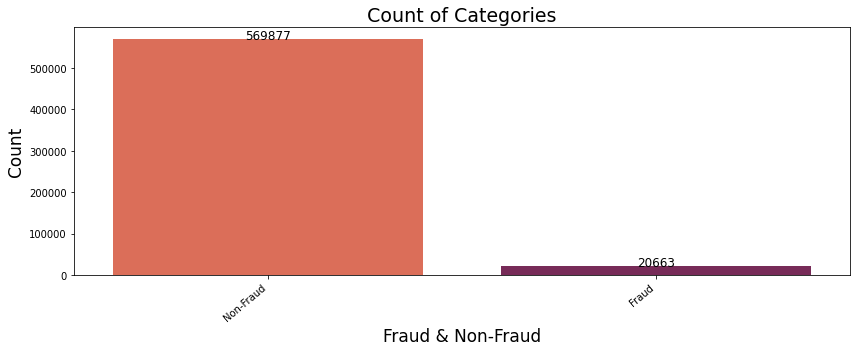

In [15]:
countplot_viz(
    train_transaction,
    "isFraud_",
    "Fraud & Non-Fraud",
    "Count",
    "Count of Categories",
    palette="rocket_r",
)

##### How to Read The Graph: 
* This graph shows count of fraud or non-fraud transactions. 
* x column shows situations, y column shows counts of situations.

##### Observation:
* We changed categorical names as Fraud and Non-Fraud.
* Count of Non-Fraud transaction more than count of Fraud transaction. 

## Understanding Variables:
### Categorical Features - Transaction:

### ProductCD:
* `Definition:` ProductCD is product code that the product for each transaction. In the data description post, they state that ProductCD is a service and not a physical product.  
* `Categories & Labels:` C, W, R, H, S

In [16]:
train_transaction.ProductCD.value_counts()

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

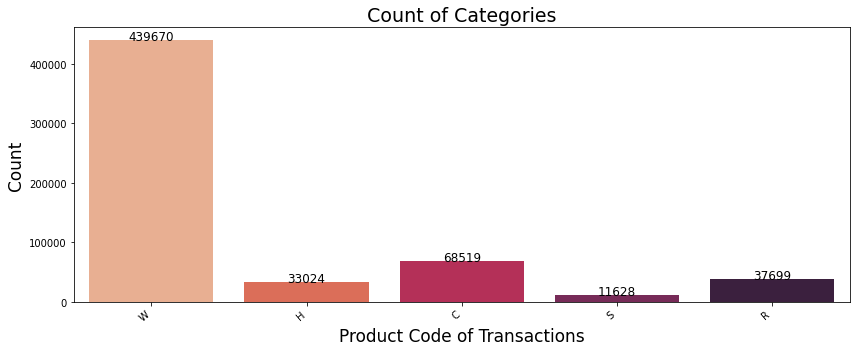

In [17]:
countplot_viz(
    train_transaction,
    "ProductCD",
    "Product Code of Transactions",
    "Count",
    "Count of Categories",
    palette="rocket_r",
)

##### How to Read The Graph: 
* This graph shows count of ProductCDs. 
* x column shows categories, y column shows counts of categories.

##### Observation:
* Count of product code W more than count of other codes. 

### Card1-Card6:
* `Definition:` card1 - card6: Payment card information, such as card type, card category, issue bank, country, etc.  
* `Definition od Card4:` Card4 shows card distributer types. 
    * `Categories & Labels:` Visa, Mastercard, American express, Discover 
* `Definition od Card6:` Card6 shows card types. 
    * `Categories & Labels:` Debit, Credit, Debit or Credit , Charge card      

In [18]:
card_cols = [c for c in train_transaction.columns if "card" in c]
train_transaction[card_cols].head(3)

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit


* We can describe only card4 and card6 of all these columns. 

In [19]:
train_transaction.card4.value_counts()

visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64

In [20]:
train_transaction.card6.value_counts()

debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64

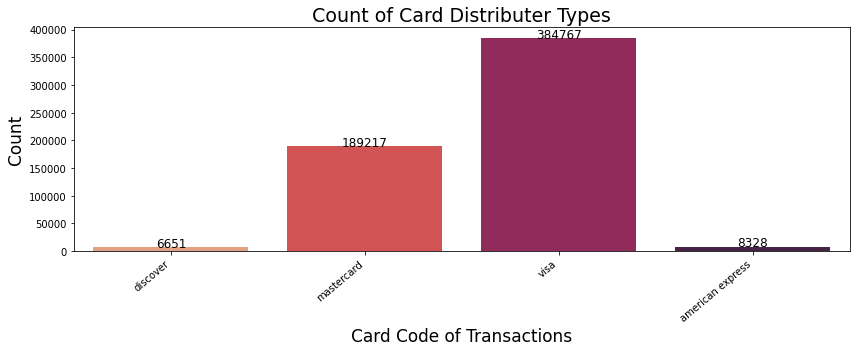

In [21]:
countplot_viz(
    train_transaction,
    "card4",
    "Card Code of Transactions",
    "Count",
    "Count of Card Distributer Types",
    palette="rocket_r",
)

##### How to Read The Graph: 
* This graph shows count of Card Distributer Types. 
* x column shows Card Distributers, y column shows counts of Card Distributers.

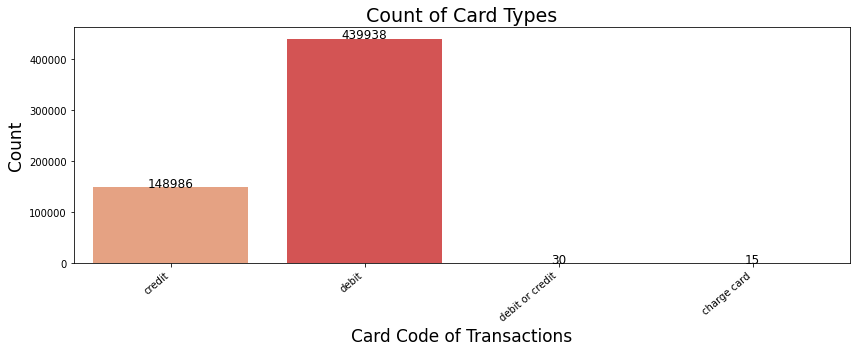

In [22]:
countplot_viz(
    train_transaction,
    "card6",
    "Card Code of Transactions",
    "Count",
    "Count of Card Types",
    palette="rocket_r",
)

##### How to Read The Graph: 
* This graph shows count of Card Types. 
* x column shows card types, y column shows counts of card types.

##### Observation:
* Card4: 
    * Count of visa card more than count of other card distributers. 
* Card6: 
    * Count of debit card more than count of other card types. 

### addr1 - addr2:
* `Definition:` They show address. Both addresses are for purchaser. 
    * addr1 as billing region
    * addr2 as billing country

In [23]:
train_transaction.addr1.nunique()

332

In [24]:
addr1_df = pd.DataFrame(train_transaction.addr1.value_counts())
addr1_df = addr1_df.rename_axis("region").reset_index()
addr1_df = addr1_df.sort_values(by=["addr1"], ascending=False).head(10)
top_region_df = train_transaction[
    train_transaction["addr1"].isin(list(addr1_df["region"]))
]

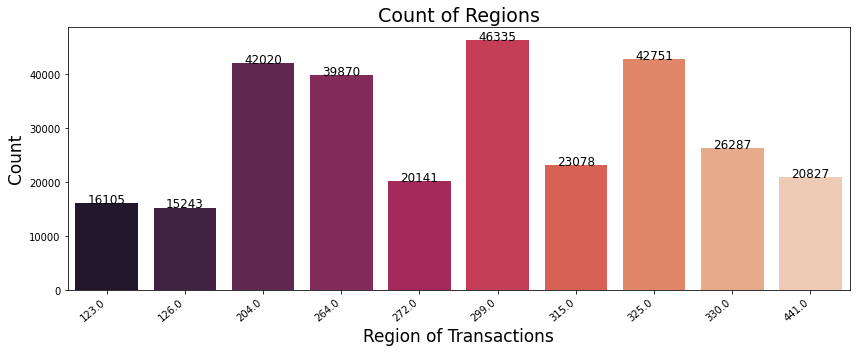

In [25]:
countplot_viz(
    top_region_df,
    "addr1",
    "Region of Transactions",
    "Count",
    "Count of Regions",
    palette="rocket",
)

In [26]:
train_transaction.addr2.nunique()

74

In [27]:
addr2_df = pd.DataFrame(train_transaction.addr2.value_counts())
addr2_df = addr2_df.rename_axis("country").reset_index()
addr2_df = addr2_df.sort_values(by=["addr2"], ascending=False).head()
top_country_df = train_transaction[
    train_transaction["addr2"].isin(list(addr2_df["country"]))
]

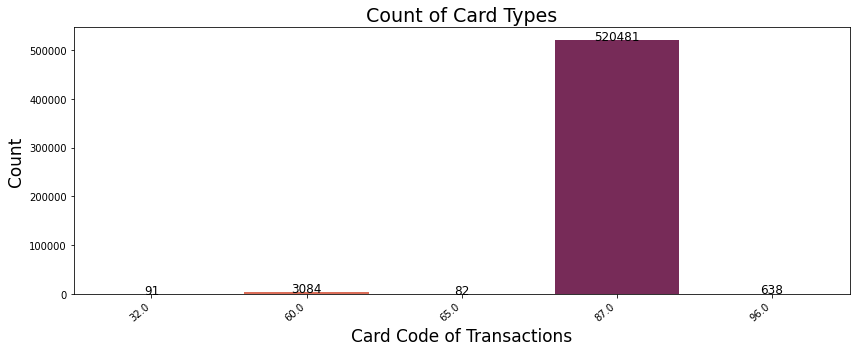

In [28]:
countplot_viz(
    top_country_df,
    "addr2",
    "Card Code of Transactions",
    "Count",
    "Count of Card Types",
    palette="rocket_r",
)

##### Observation:
* addr1: 
    * There are 332 unique regions in dataframe. We show top 10 region that have most transaction.  
* addr2: 
    * There are 74 unique countries in dataframe. We show top 5 countries that have most transaction.

### P_emaildomain: 
* `Definition:` They show purchaser email domain.
* I will group all e-mail domains by the respective enterprises.
* Also, I won't include less than 1000 entries.

### alttaki kodun daha iyisini yaz

In [29]:
P_email_df = pd.DataFrame(train_transaction.P_emaildomain.value_counts())
P_email_df = P_email_df.rename_axis("email").reset_index()
P_email_df = P_email_df[P_email_df["P_emaildomain"] > 1000]
x = train_transaction[
    train_transaction["P_emaildomain"].isin(list(P_email_df["email"]))
]

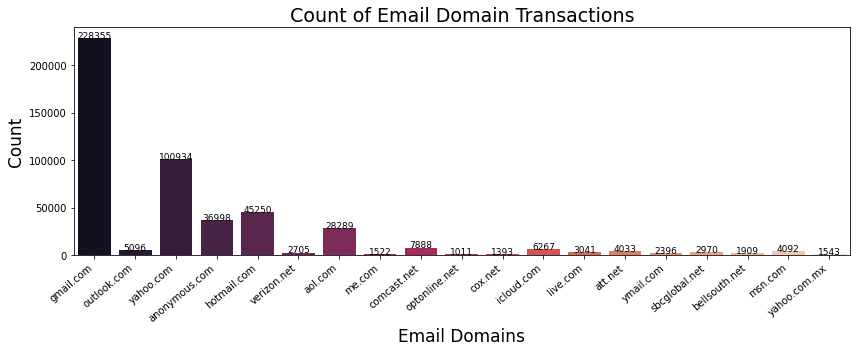

In [30]:
countplot_viz(
    data=x,
    xcolumn="P_emaildomain",
    xlabel="Email Domains",
    ylabel="Count",
    title="Count of Email Domain Transactions",
    palette="rocket",
    fontsize_text=9,
)

##### How to Read The Graph: 
* This graph shows count of transaction's email domains. 
* x column shows email domains, y column shows counts of email domain transactions.

##### Observation:
* Transactions that were done with Gmail and outlook have most count. 

### R_emaildomain: 
* `Definition:` They show recipient email domain. Certain transactions don't need recipient, so R_emaildomain is null.
* I will group all e-mail domains by the respective enterprises.
* Also, I won't include less than 1000 entries.

In [31]:
R_email_df = pd.DataFrame(train_transaction.R_emaildomain.value_counts())
R_email_df = R_email_df.rename_axis("email").reset_index()
R_email_df = R_email_df[R_email_df["R_emaildomain"] > 1000]
y = train_transaction[
    train_transaction["R_emaildomain"].isin(list(R_email_df["email"]))
]

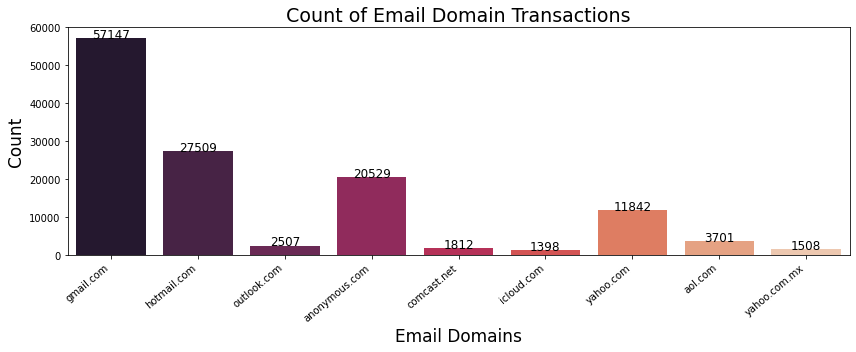

In [32]:
countplot_viz(
    data=y,
    xcolumn="R_emaildomain",
    xlabel="Email Domains",
    ylabel="Count",
    title="Count of Email Domain Transactions",
    palette="rocket",
)

##### How to Read The Graph: 
* This graph shows count of transaction's email domains. 
* x column shows email domains, y column shows counts of email domain transactions.

##### Observation:
* Transactions that were done with Gmail and hotmail have most count. 
* At here most second transaction count belong hotmail but at P_emaildomain most second transaction count belonged outlook. 

### M1- M9:
* `Definition:` They show match, such as names on card and address, etc.
* `Categories & Labels:` T = True, F= False, NaN values
* `Categories & Labels for M4:` M0, M1, M2

In [33]:
M_cols = [m for m in train_transaction.columns if "M" in m]
train_transaction[M_cols].head(3)

,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,T,T,T,M2,F,T,NaN,NaN,NaN
1,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN
2,T,T,T,M0,F,F,F,F,F


In [34]:
train_transaction.M4.value_counts()

M0    196405
M2     59865
M1     52826
Name: M4, dtype: int64

for col in ["M1", "M2", "M3", "M4", "M5", "M6", "M7", "M8", "M9"]:
    countplot_viz(
        train_transaction,
        col,
        col,
        "Count",
        "Count of M",
        palette="rocket",
    )

##### How to Read The Graph: 
* These graphs show count of Ms. 
* x column shows M situations, y column shows counts of M situations.

##### Observation:
* 

### Numerical Features - Transaction:
### TransactionAmt:

* `Definition:` TransactionAmt shows transaction payment amount in USD

* I called `df_descriptive_statistics` from `util_reporting.py`.
* This function does;
    * Gets a Python Pandas dataframe and list of columns to visualize descriptive statistics about those columns.

In [35]:
list_of_column_descriptive = ["TransactionAmt"]
df_descriptive_statistics(train_transaction, list_of_column_descriptive)

Descriptive Statisctics for column:
--------------------------
        TransactionAmt
count   590540.000000
mean       135.027176
std        239.162522
min          0.251000
25%         43.321000
50%         68.769000
75%        125.000000
max      31937.391000

Mode values for column:
--------------------------
    TransactionAmt
0            59.0



* I called `boxplot_viz` from `util_reporting.py`.
* This function does;
    * This function visualizes a boxplot for a column.

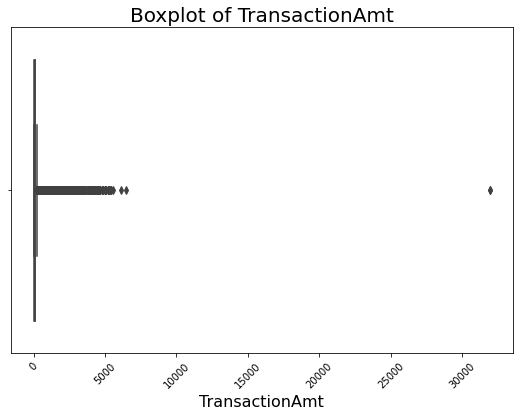

In [36]:
boxplot_viz(
    train_transaction,
    "TransactionAmt",
    xlabel="TransactionAmt",
    title="Boxplot of TransactionAmt",
)

##### How to Read The Graph: 
* This graph shows description statistics of Age column. 
* `The minimum` (the smallest number in the data set). The minimum is shown at the far left of the chart, at the end of the left “whisker.”
* `First quartile`, Q1, is the far left of the box (or the far right of the left whisker).
* `The median` is shown as a line in the center of the box.
* `Third quartile`, Q3, shown at the far right of the box (at the far left of the right whisker).
* `The maximum` (the largest number in the data set), shown at the far right of the box.
* Data sets can sometimes contain `outliers` that are suspected to be anomalies (perhaps because of data collection errors or just plain old flukes). If outliers are present, the whisker on the appropriate side is drawn to 1.5 * IQR rather than the data minimum or the data maximum. Small circles or unfilled dots are drawn on the chart to indicate where suspected outliers lie. Filled circles are used for known outliers.

* I called `calculating_zscore` from `util_feature_engineering.py`.
* This function does;
    * This function calculating z score for column list. 
    * Creating new column to show outlier and non-outlier values as categorical. 

In [37]:
cols = ["TransactionAmt"]
train_transaction = calculating_zscore(train_transaction, cols)

In [38]:
# Total outlier and non-outlier count

train_transaction["TransactionAmt_zscore_outlier"].value_counts()

non-outlier    580447
outlier         10093
Name: TransactionAmt_zscore_outlier, dtype: int64

##### Observation:
* Descriptive Statisctics: 
    * Avg, median and mode are totally different. Because of this situation distribution is right skewed (positive skew). 
    * Mean value shows avg transaction amount is 135$. 
* Boxplot Graph and zscore Table:
    * Outliers' count is huge at TransactionAMT column. 
    * We'll use TransactionAmt_zscore_outlier column to see reason of outlier values is fraud or not. 

### Time Serial Features - Transaction:
### TransactionDT:
https://www.kaggle.com/c/ieee-fraud-detection/discussion/100400#latest-579480

* `Definition:` Timedelta from a given reference datetime (not an actual timestamp)

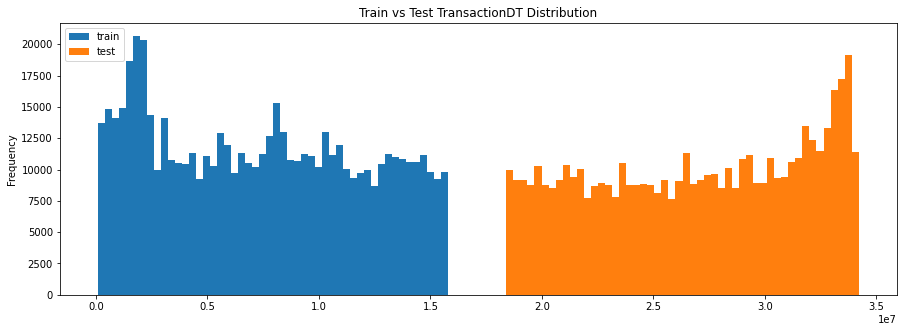

In [39]:
train_transaction["TransactionDT"].plot(
    kind="hist",
    figsize=(15, 5),
    label="train",
    bins=50,
    title="Train vs Test TransactionDT Distribution",
)
test_transaction["TransactionDT"].plot(kind="hist", label="test", bins=50)
plt.legend()

* I called `creating_date_columns` from `util_feature_engineering.py`.
* This function does;
    * Gets a Python Pandas dataframe and converting time delta date_column to date and creating new columns as date, weekdays, hours and days. 

In [40]:
creating_date_columns(train_transaction, "TransactionDT", START_DATE="2017-12-01")
train_transaction.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V337,V338,V339,isFraud_,TransactionAmt_zscore,TransactionAmt_zscore_outlier,Date,Weekdays,Hours,Days
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,Non-Fraud,-0.278167,non-outlier,2017-12-02 00:00:00,5,0,2
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,Non-Fraud,-0.443327,non-outlier,2017-12-02 00:00:01,5,0,2
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,Non-Fraud,-0.317889,non-outlier,2017-12-02 00:01:09,5,0,2


##### Observation:
* We converted TransactionDT column. We'll use these columns at "Bivariate Relationships". 

### Understanding Target Variable
### isFraud Column
* `Definition:` It shows fraud situation of transactions.  
* `Categories & Labels:` 0 = Non-Fraud, 1 = Fraud.
* I created "isFraud_" column for showing the column as categorical names. I'll use it to show bivariate relationships. 

In [41]:
train_transaction.isFraud_.value_counts()

Non-Fraud    569877
Fraud         20663
Name: isFraud_, dtype: int64

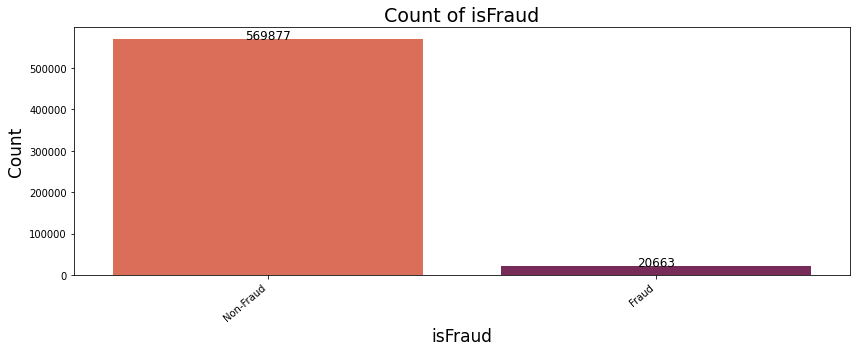

In [42]:
countplot_viz(
    train_transaction,
    "isFraud_",
    "isFraud",
    "Count",
    "Count of isFraud",
    palette="rocket_r",
)

##### Observation:
* We have 3.4% of Fraud transactions in the dataset.
* 3.4% seems small in all data but it can be change that if the amount percentual is higher or lower than 3.5% of total. We'll see it later.

## Bivariate Relationships:
### ProductCD & isFraud: 

In [43]:
pd.crosstab(
    train_transaction.isFraud_, train_transaction.ProductCD, margins=True
).style.background_gradient(cmap="mako")

ProductCD,C,H,R,S,W,All
isFraud_,,,,,,
Fraud,8008,1574,1426,686,8969,20663
Non-Fraud,60511,31450,36273,10942,430701,569877
All,68519,33024,37699,11628,439670,590540


* I called `countplot_pointplot_viz` from `util_feature_engineering.py`.
* This function does;
    * Gets a Python Pandas dataframe and visualize a countplot and a pointplot. 

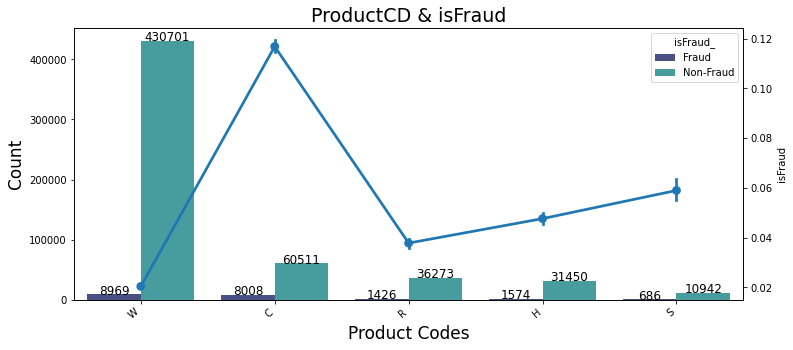

In [44]:
filter_list = ["Fraud", "Non-Fraud"]
countplot_pointplot_viz(
    train_transaction,
    filter_list,
    "ProductCD",
    "isFraud_",
    "isFraud",
    "Product Codes",
    "Count",
    "ProductCD & isFraud",
)

##### How to Read The Graph: 
* Countplot shows count of fraud and non-fraud transactions by product codes.   
* Pointplot shows percentage of fraud in all transaction of Product Codes. 
* x column shows product codes.
* y column shows; 
    * Counts of product codes by isFraud_ column.
    * Percentage of fraud in all transaction of Product Codes.

##### Observation:
* The most of transaction belong "W" product code. 
* The most of fraudelent activities belong "C" product code with 11,5%.

### Card1-Card6 & isFraud: 

* We can use card4 and card6 for analyse. 
    * card4 : Credit card distributers
    * card6 : Card types

### Card4 & isFraud:

In [45]:
pd.crosstab(
    train_transaction.isFraud_, train_transaction.card4, margins=True
).style.background_gradient(cmap="mako")

card4,american express,discover,mastercard,visa,All
isFraud_,,,,,
Fraud,239,514,6496,13373,20622
Non-Fraud,8089,6137,182721,371394,568341
All,8328,6651,189217,384767,588963


* I called `countplot_pointplot_viz` from `util_feature_engineering.py`.
* This function does;
    * Gets a Python Pandas dataframe and visualize a countplot and a pointplot. 

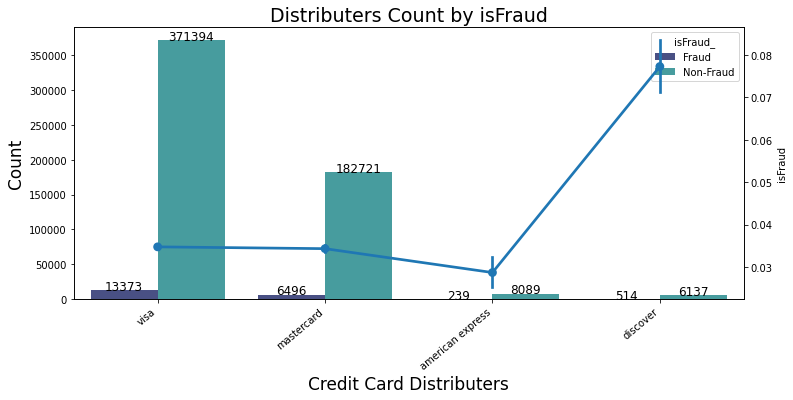

In [46]:
filter_list = ["Fraud", "Non-Fraud"]
countplot_pointplot_viz(
    train_transaction,
    filter_list,
    "card4",
    "isFraud_",
    "isFraud",
    "Credit Card Distributers",
    "Count",
    "Distributers Count by isFraud",
)

##### How to Read The Graph: 
* Countplot shows count of fraud and non-fraud transactions by card4.   
* Pointplot shows percentage of fraud in all transaction of Credit Card Distributers. 
* x column shows Credit Card Distributers.
* y column shows; 
    * Counts of Credit Card Distributers by isFraud_ column.
    * Percentage of fraud in all transaction of Credit Card Distributers.

##### Observation:
* The most of transactions were done with "visa". The second most of transactions were done with "mastercard". Because of that fraudelent transaction counts of these distributers are high than other. But we should look that how much high fraudelent transaction in all transaction of these distributers.  
    * In total transactions of visa, fraudelent transactions' percentege is 0,034. 
    * In total transactions of mastercard, fraudelent transactions' percentege is 0,034. 
    * In total transactions of discover, fraudelent transactions' percentege is 0,077. 
    * In total transactions of american express, fraudelent transactions' percentege is 0,028. 
* Due to above results we can say that "discover" open to fraudelent activities than other distributers. 

### Card6 & isFraud:

In [47]:
pd.crosstab(
    train_transaction.isFraud_, train_transaction.card6, margins=True
).style.background_gradient(cmap="mako")

card6,charge card,credit,debit,debit or credit,All
isFraud_,,,,,
Fraud,0,9950,10674,0,20624
Non-Fraud,15,139036,429264,30,568345
All,15,148986,439938,30,588969


* I called `countplot_pointplot_viz` from `util_feature_engineering.py`.
* This function does;
    * Gets a Python Pandas dataframe and visualize a countplot and a pointplot. 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


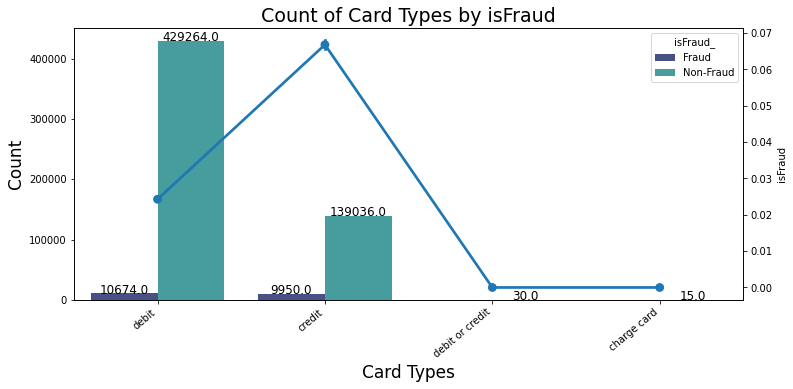

In [48]:
filter_list = ["Fraud", "Non-Fraud"]
countplot_pointplot_viz(
    train_transaction,
    filter_list,
    "card6",
    "isFraud_",
    "isFraud",
    "Card Types",
    "Count",
    "Count of Card Types by isFraud",
)

##### How to Read The Graph: 
* Countplot shows count of fraud and non-fraud transactions by card6.   
* Pointplot shows percentage of fraud in all transaction of card types. 
* x column shows card types.
* y column shows; 
    * Counts of card types by isFraud_ column.
    * Percentage of fraud in all transaction of card types.

##### Observation:
* The most of transactions were done with "debit". The second most of transactions were done with "credit card". 
* In total transactions of credit card, fraudelent transactions' rate is 0,066%. This rate is highest rate in all card types. Due to that results we can say that "credit card" open to fraudelent activities than other distributers. 

### addr1-addr2 & isFraud:

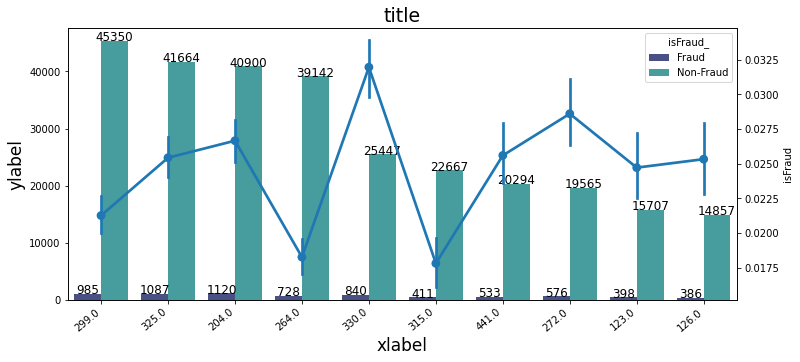

In [49]:
filter_list = ["Fraud", "Non-Fraud"]
countplot_pointplot_viz(
    top_region_df,
    filter_list,
    "addr1",
    "isFraud_",
    "isFraud",
    "xlabel",
    "ylabel",
    "title",
)

### TransactionAmt & isFraud: 

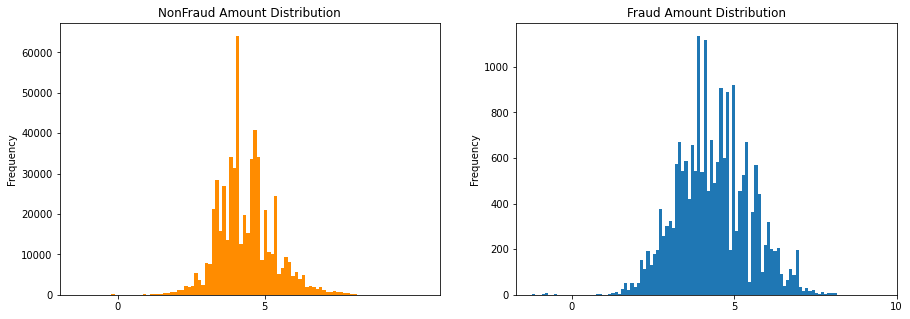

In [50]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
train_transaction[train_transaction["isFraud"] == 0]["TransactionAmt"].apply(
    np.log
).plot.hist(ax=ax[0], bins=100, color="darkorange")
ax[0].set_title("NonFraud Amount Distribution")
x1 = list(range(0, 10, 5))
ax[0].set_xticks(x1)

train_transaction[train_transaction["isFraud"] == 1]["TransactionAmt"].apply(
    np.log
).plot.hist(ax=ax[1], bins=100)
ax[1].set_title("Fraud Amount Distribution")
x2 = list(range(0, 15, 5))
ax[1].set_xticks(x2)

##### Observations: 
* Avg TransactionAmt and median-mode are not closely. Distribution is right skewed (positive skew). The Avg of transaction amount is $135. 
* There are outliers at TransactionAmt column. 
* I've taken a log transform in some of these plots to better show the distribution- otherwise the few, very large transactions skew the distribution. Because of the log transfrom, any values between 0 and 1 will appear to be negative.
* Fraudulent charges appear to have a higher average transaction amount. 